<a href="https://colab.research.google.com/github/Sanjanathakal/CPE695FP/blob/master/SER_PROJECT(Data%20Prep).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPEECH EMOTION RECOGNITION

### IMPORTING LIBRARIES

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import keras
import os
import os.path
import sys

import librosa                                                          #To extract the data from the audio files.
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier                      #For KNN
from sklearn.svm import SVC                                             #For SVM
from sklearn.preprocessing import LabelEncoder                          #For Naives Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio                                       #To play the audio files

### PREPROCESSING THE DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Defining the path of the dataset files.

In [3]:
Savee="/content/drive/MyDrive/CPE PROJECT/DATASETS/ALL"
Crema = "/content/drive/MyDrive/CPE PROJECT/DATASETS/AudioWAV"
Tess = "/content/drive/MyDrive/CPE PROJECT/DATASETS/TESS Toronto emotional speech set data"
Ravdess = "/content/drive/MyDrive/CPE PROJECT/DATASETS/audio_speech_actors_01-24"

In [4]:
"""Ravdess = "/Users/sanjanathakal/Project/archive/audio_speech_actors_01-24/"
Crema = "/Users/sanjanathakal/Project/AudioWAV/"
Tess = "/Users/sanjanathakal/Project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/Users/sanjanathakal/Project/ALL"
"""

'Ravdess = "/Users/sanjanathakal/Project/archive/audio_speech_actors_01-24/"\nCrema = "/Users/sanjanathakal/Project/AudioWAV/"\nTess = "/Users/sanjanathakal/Project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"\nSavee = "/Users/sanjanathakal/Project/ALL"\n'

#### For dataset 1 : RAVDESS

In [5]:
##For dataset 1 : RAVDESS
import os
import pandas as pd

Ravdess_Dir_list = os.listdir(Ravdess)
emotionfile = []
pathfile = []
for i in Ravdess_Dir_list:
    newpath = os.listdir(Ravdess+"/"+i)
    #print(newpath)
    for j in newpath:
        part = j.split('.')[0]
        part = part.split('-')
        emotionfile.append(int(part[2]))
        pathfile.append(Ravdess + "/"+ i + '/' + j)

emotion_df = pd.DataFrame(emotionfile, columns=['Emotions'])     # Creating a dataframe for emotions.
path_df = pd.DataFrame(pathfile, columns=['Path'])               # Creating a dataframe for path of files.

Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Assigning Unique emotion to the integers for the file name
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print("These are the unique emtotions found in this dataset: ", Ravdess_df.Emotions.unique())
print("\nPrinting the data sample :")
Ravdess_df.head()

These are the unique emtotions found in this dataset:  ['neutral' 'angry' 'sad' 'happy' 'calm' 'fear' 'surprise' 'disgust']

Printing the data sample :


,Emotions,Path
0,neutral,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
1,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
2,sad,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
3,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
4,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...


#### For dataset 2 : CREMA-D

In [6]:
import os
import pandas as pd

cremadirectorylist = os.listdir(Crema)

Cemotionfile = []
Cpathfile  = []

for i in cremadirectorylist:
    # storing file paths
    Cpathfile.append(Crema + "/" + i)
    # storing file emotions
    part=i.split('_')
    #print(part)
    if part[2] == 'SAD':
        Cemotionfile.append('sad')
    elif part[2] == 'ANG':
        Cemotionfile.append('angry')
    elif part[2] == 'DIS':
        Cemotionfile.append('disgust')
    elif part[2] == 'FEA':
        Cemotionfile.append('fear')
    elif part[2] == 'HAP':
        Cemotionfile.append('happy')
    elif part[2] == 'NEU':
        Cemotionfile.append('neutral')
    else:
        Cemotionfile.append('Unknown')
        

emotion_df = pd.DataFrame(Cemotionfile, columns=['Emotions'])       # Creating a dataframe for emotions.
path_df = pd.DataFrame(Cpathfile, columns=['Path'])                 # Creating a dataframe for path of files.

Crema_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset: ", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Crema_df.head()

These are the unique emtotions found in this dataset:  ['disgust' 'neutral' 'happy' 'sad' 'angry' 'fear']

Printing the data sample :


,Emotions,Path
0,disgust,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...
1,neutral,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...
2,disgust,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...
3,neutral,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...
4,disgust,/content/drive/MyDrive/CPE PROJECT/DATASETS/Au...


#### For dataset 1 : TESS

In [7]:
tessDirlist = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tessDirlist:
    directories = os.listdir(Tess + "/" + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + "/" + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])  # Creating a dataframe for emotions.
path_df = pd.DataFrame(file_path, columns=['Path'])            # Creating dataframe for path of files.

Tess_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset:", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Tess_df.head()

These are the unique emtotions found in this dataset: ['happy' 'surprise' 'disgust' 'sad' 'angry' 'neutral' 'fear']

Printing the data sample :


,Emotions,Path
0,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...
1,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...
2,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...
3,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...
4,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/TE...


#### For dataset 1 : SAVEE

In [8]:
SaveeDirlist = os.listdir(Savee)

file_emotion = []
file_path = []

for file in SaveeDirlist:
    file_path.append(Savee + "/" + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions']) # Creating a dataframe for emotions.
path_df = pd.DataFrame(file_path, columns=['Path'])           # Creating dataframe for path of files.

Savee_df = pd.concat([emotion_df, path_df], axis=1)
print("These are the unique emtotions found in this dataset:", emotion_df.Emotions.unique())
print("\nPrinting the data sample :")
Savee_df.head()

These are the unique emtotions found in this dataset: ['angry' 'fear' 'happy' 'disgust' 'neutral' 'sad' 'surprise']

Printing the data sample :


,Emotions,Path
0,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...
1,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...
2,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...
3,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...
4,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/AL...


### Concatinating all the datasets.

In [9]:
Finaldataset = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0,ignore_index=True)
p=os.getcwd()
print (p)
Finaldataset.to_csv(p+"data_path.csv",index=False)
print(Finaldataset.shape)
print("These are the unique emtotions found in this dataset: \n", Finaldataset.Emotions.unique())
print("\nThe sample of the concatinated datasets is as follows :")
Finaldataset.head(100)


/content
(4880, 2)
These are the unique emtotions found in this dataset: 
 ['neutral' 'angry' 'sad' 'happy' 'calm' 'fear' 'surprise' 'disgust']

The sample of the concatinated datasets is as follows :


,Emotions,Path
0,neutral,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
1,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
2,sad,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
3,angry,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
4,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
...,...,...
95,happy,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
96,calm,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
97,sad,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...
98,disgust,/content/drive/MyDrive/CPE PROJECT/DATASETS/au...


### Sample of the data :

In [10]:
import numpy as np
from IPython.display import Audio ,display
path = np.array(Finaldataset.Path[Finaldataset.Emotions=="angry"])[10]
display(Audio(filename= path))

### Visualizaing and Exploring the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


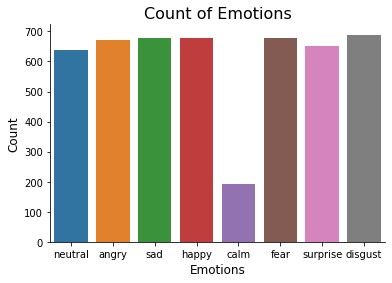

In [11]:
#Creating a plot to count the data in each unique emotion.

import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(Finaldataset.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Data Augmentation 

In [12]:
import numpy as np
import librosa                                                          #To extract the data from the audio files.
import librosa.display

def noise(sample):
    noise_amp = 0.035*np.random.uniform()*np.amax(sample)
    sample = sample + noise_amp*np.random.normal(size=sample.shape[0])
    return sample

def stretch(sample, rate=0.8):
    return librosa.effects.time_stretch(sample, rate)

def shift(sample):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(sample, shift_range)

def pitch(sample, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(sample, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(Finaldataset.Path)[1]
sample, sample_rate = librosa.load(path)

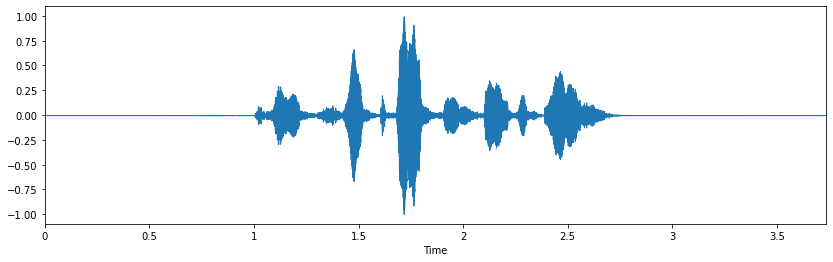

In [13]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=sample, sr=sample_rate)
Audio(path)

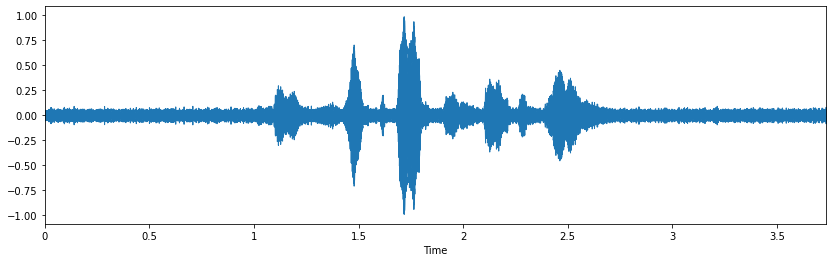

In [14]:
x = noise(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

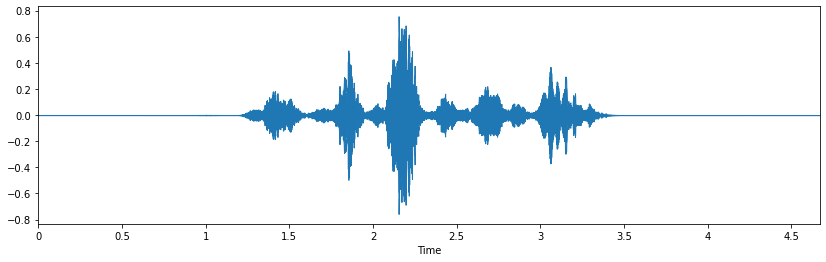

In [15]:
x = stretch(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

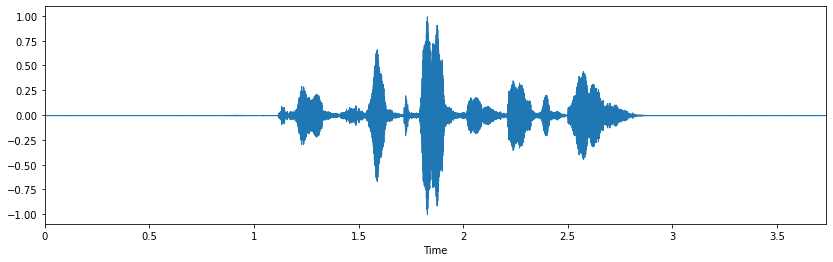

In [16]:
x = shift(sample)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

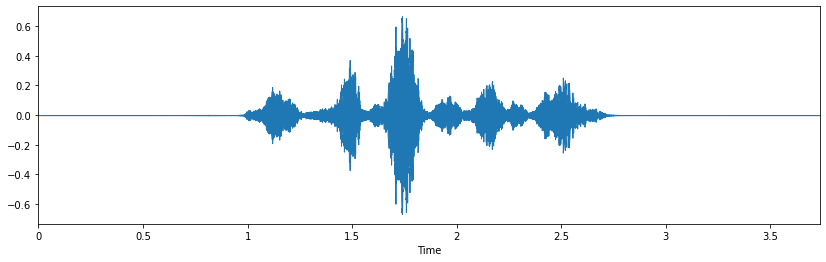

In [17]:
x = pitch(sample, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### Feature Extrction and Feature Selection


In [18]:
import numpy as np
import librosa                                                          #To extract the data from the audio files.
import librosa.display
import librosa.feature

def extract_features(sample):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=sample).T, axis=0)
    #print(zcr.shape)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(sample))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    #print(chroma_stft.shape)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=sample, sr=sample_rate).T, axis=0)
    #print(mfcc.shape)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=sample).T, axis=0)
    #print(rms.shape)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=sample, sr=sample_rate).T, axis=0)
    #print(mel.shape)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    sample, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(sample)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(sample)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(sample)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

### Preparing and Storing our Finaldataset.

In [72]:
import pandas as pd
f = pd.DataFrame()
l= pd.DataFrame()
for i in range(0,9):
  X, Y = [], []
  for path, emotion in zip(Finaldataset.Path[610*i:610*(i+1)], Finaldataset.Emotions[610*i:610*(i+1)]):
    #print(path)
      # print(emotion)
      feature = get_features(path)
      for ele in feature:
          X.append(ele)
          # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
          Y.append(emotion)
  f=f.append(pd.DataFrame(X))
  l=l.append(pd.DataFrame(Y))

Features=pd.concat([f,l],ignore_index=True,axis=1)
Features = Features.rename({162 : 'labels'}, axis=1)
Features.to_csv('features.csv', index=False)



KeyboardInterrupt: ignored

In [73]:
Features.shape

(14640, 163)

In [74]:
import pandas as pd
Features.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,labels
0,0.271150,0.603639,0.616662,0.622911,0.598877,0.557231,0.549840,0.570937,0.542793,0.623724,0.609216,0.529881,0.539296,-574.108215,62.517895,5.430377,11.707921,-1.516069,-13.820964,-17.586885,-10.436315,-7.318607,-5.152712,-8.883949,-1.437721,-7.852219,-6.023215,-5.475103,-7.682262,-3.090790,-3.302452,-9.585439,-1.858403,0.006269,8.705545e-06,1.554305e-05,0.000045,0.000042,0.002857,0.018046,...,0.000258,0.000210,0.000347,0.000307,0.000405,0.000209,0.000222,0.000534,0.000559,0.000311,0.000371,0.000568,0.000618,0.000473,0.000641,0.001285,0.001389,0.000946,0.000611,0.000560,0.000630,0.000719,0.000627,0.000497,0.000319,0.000364,0.000516,0.000502,0.000790,0.001076,0.001164,0.001540,0.001109,0.000746,0.000557,0.000437,0.000321,0.000151,1.396998e-05,neutral
1,0.276878,0.632624,0.665410,0.642072,0.647839,0.649836,0.605519,0.607156,0.582367,0.626948,0.670471,0.599262,0.577326,-490.032333,41.112865,9.401888,5.947942,-3.049799,-12.776820,-16.512490,-10.767548,-7.191924,-5.370101,-6.352709,-2.236228,-6.717593,-6.048542,-5.470049,-5.873974,-2.843601,-3.140472,-8.238134,-2.973541,0.006356,1.555346e-05,2.458707e-05,0.000057,0.000050,0.002888,0.018103,...,0.000262,0.000220,0.000357,0.000314,0.000408,0.000213,0.000228,0.000548,0.000570,0.000317,0.000377,0.000574,0.000625,0.000479,0.000655,0.001303,0.001402,0.000956,0.000619,0.000566,0.000639,0.000717,0.000628,0.000500,0.000325,0.000368,0.000525,0.000509,0.000800,0.001079,0.001174,0.001549,0.001125,0.000756,0.000566,0.000447,0.000329,0.000158,2.039129e-05,neutral
2,0.204810,0.482423,0.550961,0.582626,0.581201,0.549067,0.497555,0.500034,0.542396,0.500369,0.591570,0.565824,0.466664,-631.253052,60.428791,2.994708,9.851025,-7.080257,-18.924084,-21.404902,-9.393946,-7.202203,-5.604732,-9.248983,-1.069509,-10.922704,-6.454436,-7.187632,-7.257210,-2.468110,-6.870809,-9.036327,-1.613288,0.002921,2.004741e-06,2.299307e-06,0.000006,0.000006,0.000234,0.004897,...,0.000022,0.000033,0.000041,0.000045,0.000084,0.000067,0.000046,0.000038,0.000057,0.000141,0.000065,0.000060,0.000073,0.000102,0.000075,0.000070,0.000140,0.000348,0.000138,0.000145,0.000092,0.000109,0.000112,0.000126,0.000131,0.000069,0.000044,0.000075,0.000081,0.000124,0.000230,0.000174,0.000259,0.000287,0.000235,0.000166,0.000082,0.000023,1.829079e-06,neutral
3,0.195466,0.581016,0.608645,0.546832,0.552553,0.566763,0.589477,0.613218,0.529801,0.535412,0.586241,0.569754,0.572658,-345.283630,42.091080,-28.061930,3.840683,-16.534403,-18.529852,-7.478187,-20.092834,-18.796429,5.871224,-13.805188,-6.761590,-3.037985,-10.445002,-5.871474,-5.410123,4.541485,1.144553,-2.401012,3.434693,0.055331,4.669371e-02,6.506137e-03,0.000808,0.000807,0.000855,0.008298,...,0.259184,0.118066,0.119371,0.122893,0.086185,0.054033,0.019944,0.022137,0.022232,0.005189,0.002895,0.003782,0.007326,0.009209,0.008706,0.004940,0.011607,0.019318,0.013566,0.008351,0.009822,0.019312,0.013746,0.013042,0.011199,0.007645,0.007790,0.006953,0.003983,0.005818,0.003077,0.003988,0.004732,0.004021,0.004737,0.004941,0.003571,0.001198,8.489242e-05,angry
4,0.362694,0.695999,0.732292,0.732399,0.753415,0.784855,0.758880,0.696659,0.656397,0.667557,0.711008,0.700781,0.698578,-130.930936,9.848831,-5.189031,-1.442965,-6.023675,-5.391727,-1.572977,-6.987224,-5.470149,1.966922,-2.115088,-3.027675,-2.123017,-3.896154,-2.532036,-0.052930,1.769615,0.965161,-0.692078,0.796803,0.067271,9.465228e-02,3.991508e-02,0.041575,0.048348,0.041496,0.039918,...,0.307216,0.163165,0.171266,0.171164,0.134961,0.090141,0.061891,0.068853,0.072482,0.050323,0.046539,0.046573,0.050132,0.055524,0.049671,0.050653,0.057675,0.063397,0.053998,0.060280,0.056800,0.060214,0.057696,0.059307,0.051942,0.050787,0.053984,0.050129,0.048814,0.049548,0.047847,0.050101,0.0